In [3]:
import pandas as pd
import numpy as np
import kaggle
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

## 1) Import NFL Draft Data from Kaggle

In [4]:
!kaggle datasets download ronitf/heart-disease-uci -f heart.csv

heart.csv: Skipping, found more recently modified local copy (use --force to force download)


### Explore and clean dataset

In [5]:
# store observations in a dataframe
hd = pd.read_csv("heart.csv")
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
hd.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
hd.describe()
# note - there are only 303 observations in the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
hd.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

C:\Users\Eric\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


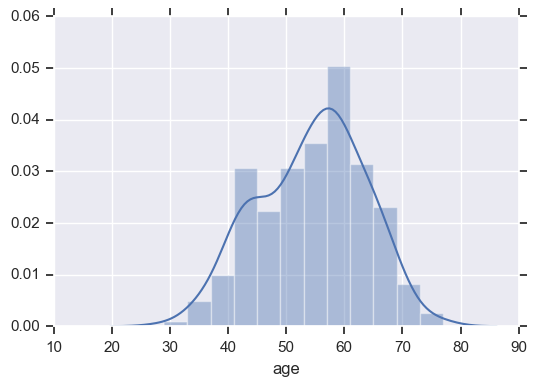

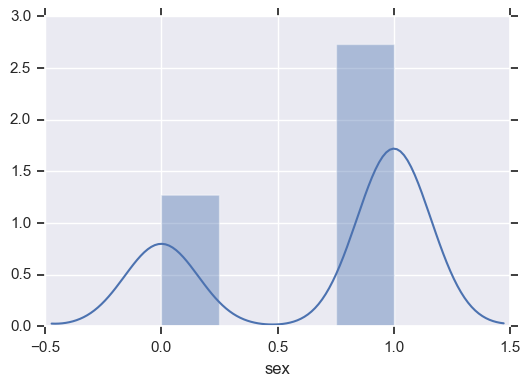

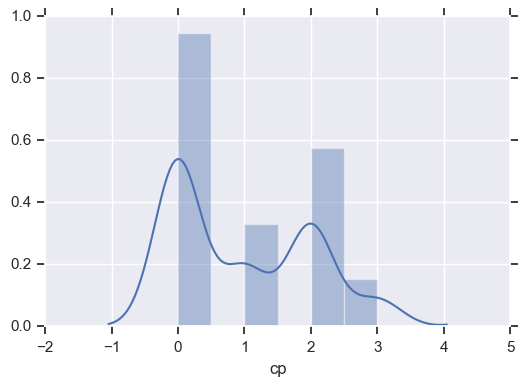

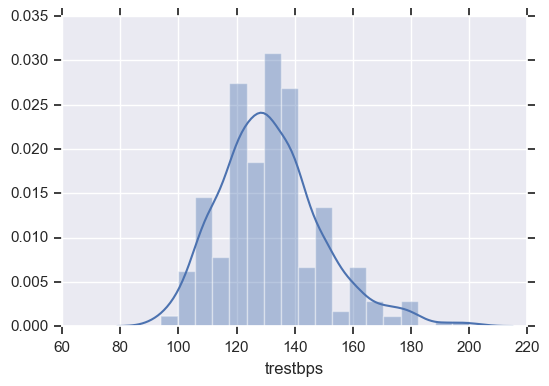

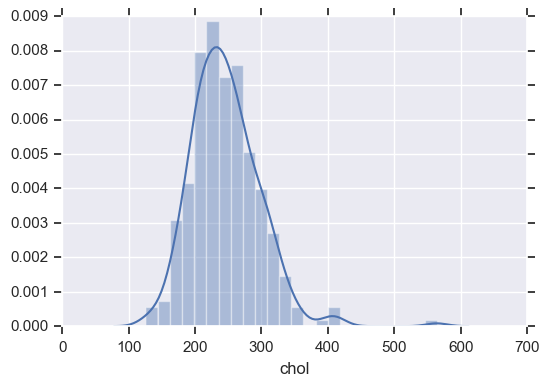

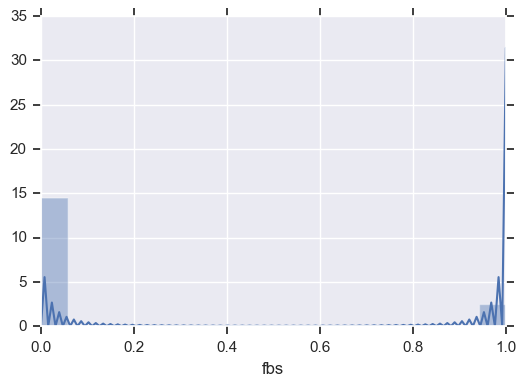

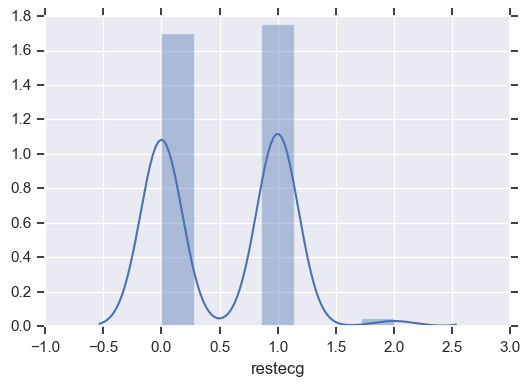

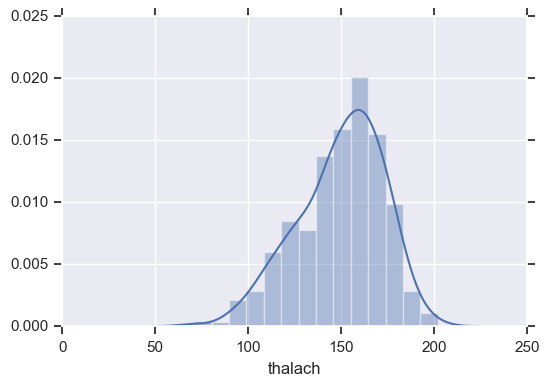

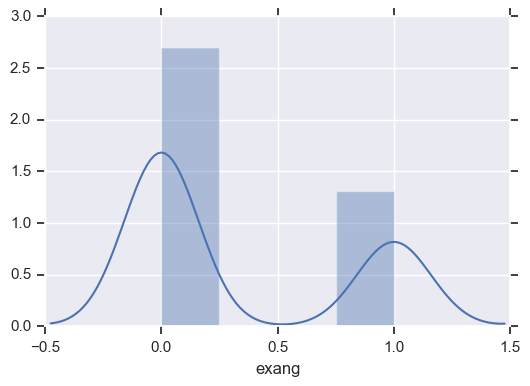

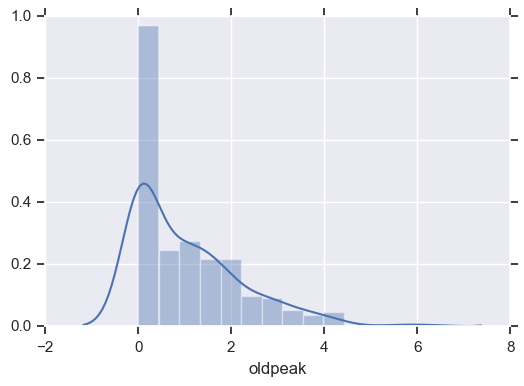

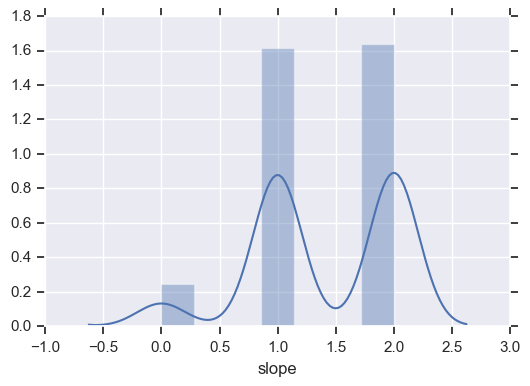

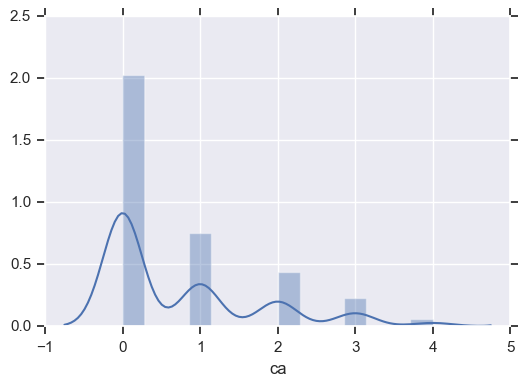

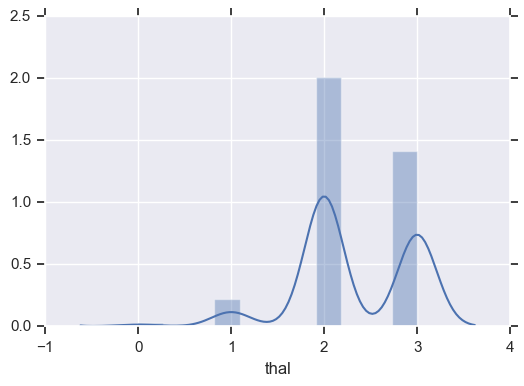

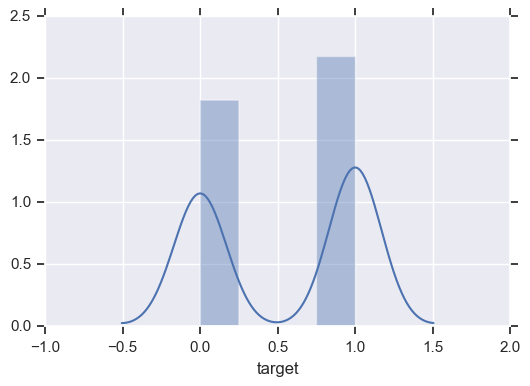

In [9]:
pd.set_option('display.max_rows', 50)
for column in hd.columns:
    sns.distplot(hd[column])
    plt.show()
    
# notice the imbalance in observations by sex

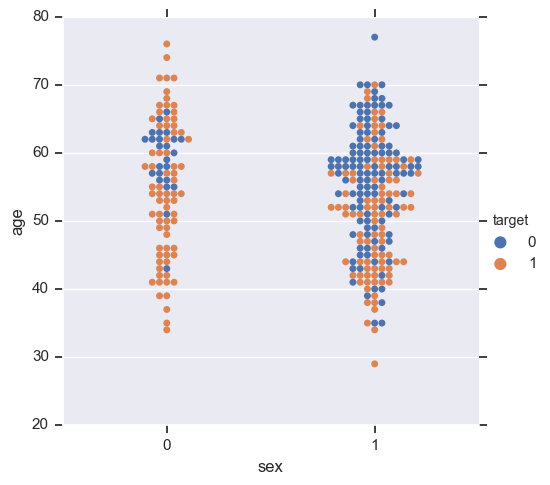

In [10]:
# explore demographic distribution
sns.catplot(x="sex", y="age", hue="target",
            kind="swarm", data=hd);
plt.show()

# women in the study appear to have a higher percentage of observations positive for heart disease
# both men and women in the study appaer to have a higher probability of heart disease at a younger age

In [11]:
#dig further into the relationship between sex and heart disease
pd.crosstab(hd.sex, hd.target).apply(lambda r: r/r.sum(), axis=1)

# 75% of women in our dataset have heart disease
# only 45% of men have heart disease

target,0,1
sex,,
0,0.250000,0.750000
1,0.550725,0.449275


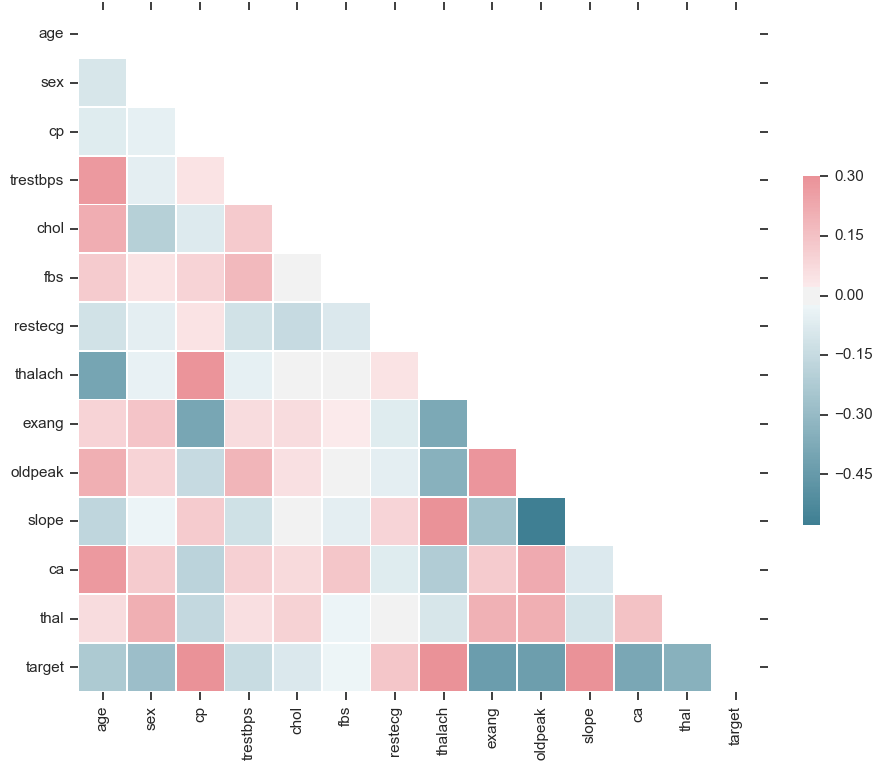

In [12]:
sns.set(style="white")

# Compute the correlation matrix
corr = hd.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

# some moderate correlation present between:
# slope and oldpeak
# thalach and age
# exang and cp
# trestbps and age
# thalach and age
# oldpeak and exang
# slope and thalach

In [25]:
x = hd.drop('target',axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [26]:
y = hd['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [33]:
# apply dimensionality reduction to reduce features to 2 dimensions for plotting

# linear
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)
x_pca = pca.transform(x)
x_pca.shape

(303, 2)

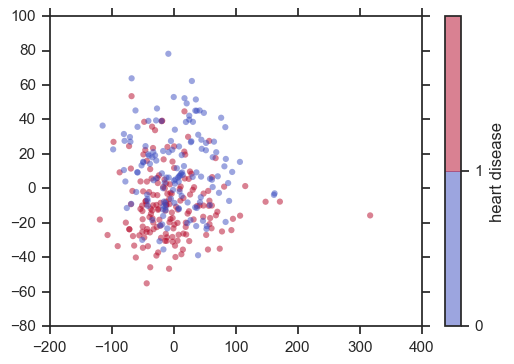

In [34]:
plt.scatter(x_pca[:,0], x_pca[:, 1], c=y, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('coolwarm',2))
plt.colorbar(label = 'heart disease',ticks=range(2))
plt.clim(0,2);
plt.show()

In [ ]:
# nonlinear dimensionality reduction 
from sklearn.manifold import Isomap
iso=Isomap(n_components=2)
iso.fit(x)
data_projected = iso.transform(x)
data_projected.shape

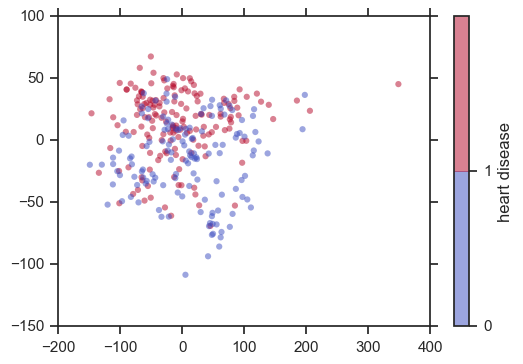

In [35]:


plt.scatter(data_projected[:,0], data_projected[:, 1], c=y, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('coolwarm',2))
plt.colorbar(label = 'heart disease',ticks=range(2))
plt.clim(0,2);
plt.show()

# Overall, the groups have some separation on the edges, but are not well separated in the center. 
# This will be a fun and challenging classification exercise

In [ ]:
from sklearn.cross_validation import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=0)

In [30]:
# start with Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(xtrain, ytrain)
y_model = model.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

# even with this extremely simple model, we obtain accuracy of 83%

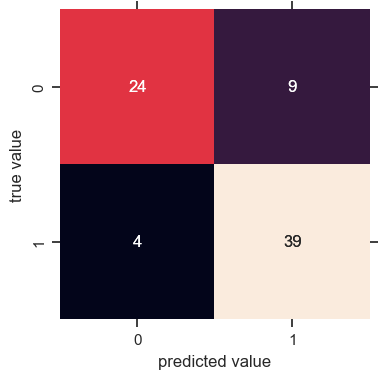

In [34]:
# examine errors with confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

In [ ]:
# further tuning of naive bayes to improve performance

In [36]:
# try logistic regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x, y)
model.fit(xtrain, ytrain)
y_model = model.predict(xtest)
accuracy_score(ytest, y_model)
# logistic model improves accuracy to 84%


0.8421052631578947

In [ ]:
# further tuning of logistic to obtain better results 

In [ ]:
# support vector machines

from sklearn.svm import SVC #support vector classifier
model = SVC(kernel='linear', C=1E10)
model.fit(x,y)
y_model = model.predict(xtest)
accuracy_score(ytest, y_model)

In [ ]:
# further tuning of SVM to obtain better results 

In [ ]:
# random forest

model = RandomForestClassifier(n_estimators=1000)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

In [ ]:
from

In [ ]:
# further tuning of RF to obtain better results 